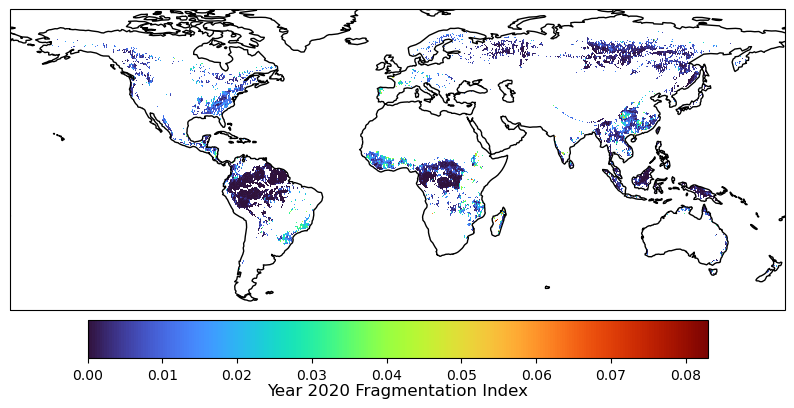

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# 加载数据
dataset2020 = gdal.Open('H:/Global_tree_cover/2020frag.tif')
# 读取数据
band = dataset2020.GetRasterBand(1)
array = band.ReadAsArray()
# 获取填充值
nodata = band.GetNoDataValue()

# 将填充值替换为NaN
array2020 = np.where(array == nodata, np.nan, array)

# 创建图像
fig = plt.figure(figsize=(10, 6),dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

# 获取数据的地理变换
geo_transform = dataset2020.GetGeoTransform()

# 根据地理变换和数据数组的形状计算图像的边界
x_min = geo_transform[0]
x_max = geo_transform[0] + geo_transform[1]*array.shape[1]
y_min = geo_transform[3] + geo_transform[5]*array.shape[0]
y_max = geo_transform[3]

# 设置图像的边界
img_extent = (x_min, x_max, y_min, y_max)

# 计算数据的90%百分位数
vmax = np.nanpercentile(array, 90)

# 在地图上绘制数据，指定图像的边界和颜色映射的范围
img = ax.imshow(array2020, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=0, vmax=vmax)

# 添加 color bar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Year 2020 Fragmentation Index', size=12, labelpad=0.6)

ax.coastlines()
plt.show()

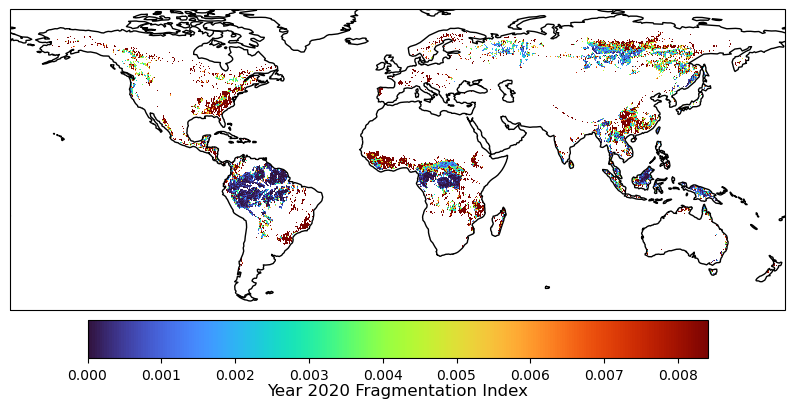

In [7]:
# 创建图像
fig = plt.figure(figsize=(10, 6),dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())


# 计算数据的98%百分位数
vmax = np.nanpercentile(array, 90)

# 在地图上绘制数据，指定图像的边界和颜色映射的范围
img = ax.imshow(array2020, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=0, vmax=vmax)

# 添加 color bar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Year 2020 Fragmentation Index', size=12, labelpad=0.6)

ax.coastlines()
plt.show()

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# 加载数据
dataset2000 = gdal.Open('H:/Global_tree_cover/2000frag.tif')
# 读取数据
band = dataset2000.GetRasterBand(1)
array = band.ReadAsArray()
# 获取填充值
nodata = band.GetNoDataValue()

# 将填充值替换为NaN
array2000 = np.where(array == nodata, np.nan, array)

# 创建图像
fig = plt.figure(figsize=(10, 6),dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

# 获取数据的地理变换
geo_transform = dataset2000.GetGeoTransform()

# 根据地理变换和数据数组的形状计算图像的边界
x_min = geo_transform[0]
x_max = geo_transform[0] + geo_transform[1]*array.shape[1]
y_min = geo_transform[3] + geo_transform[5]*array.shape[0]
y_max = geo_transform[3]

# 设置图像的边界
img_extent = (x_min, x_max, y_min, y_max)

# 计算数据的98%百分位数
vmax = np.nanpercentile(array, 90)

# 在地图上绘制数据，指定图像的边界和颜色映射的范围
img = ax.imshow(array2000, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=0, vmax=vmax)

# 添加 color bar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Year 2000 Fragmentation Index', size=12, labelpad=0.6)

ax.coastlines()
plt.show()

In [26]:
# 创建图像
fig = plt.figure(figsize=(10, 6),dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
# 设置图像的边界
img_extent = (x_min, x_max, y_min, y_max)

# 计算数据的99%百分位数
vmax = np.nanpercentile((array2020-array2000), 80)
vmin = np.nanpercentile((array2020-array2000), 20)

length = min(abs(vmax),abs(vmin))
# 在地图上绘制数据，指定图像的边界和颜色映射的范围
img = ax.imshow((array2020-array2000), origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=vmin, vmax=vmax,, norm=norm)

# 添加 color bar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Year 2000 Fragmentation Index', size=12, labelpad=0.6)

ax.coastlines()
plt.show()

SyntaxError: invalid syntax (1533121145.py, line 13)

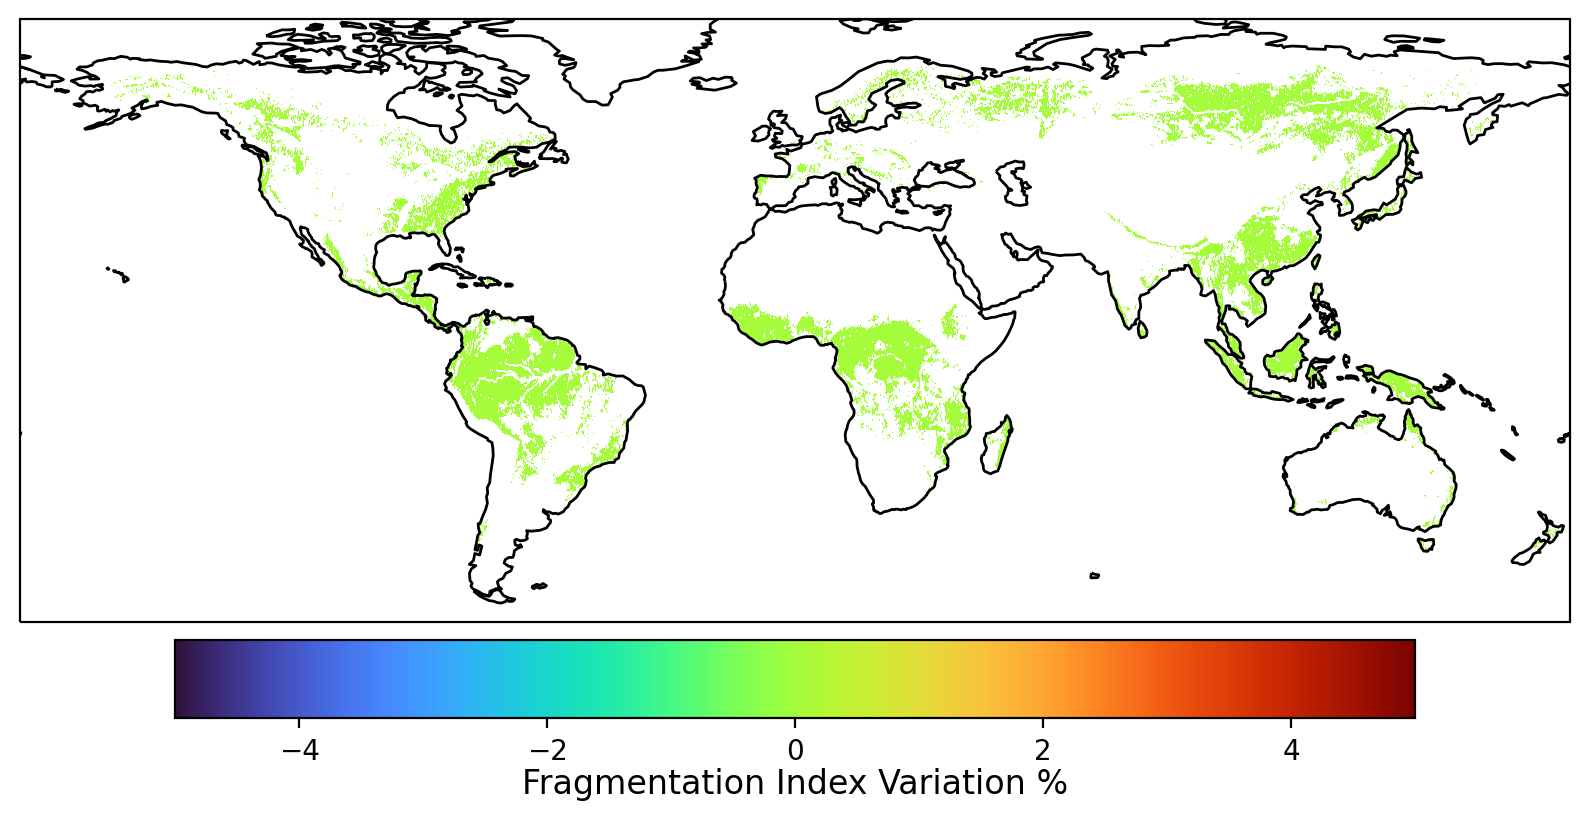

In [25]:
# 创建图像
fig = plt.figure(figsize=(10, 6),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
# 设置图像的边界
img_extent = (x_min, x_max, y_min, y_max)
epsilon = 1e-6  # 调整epsilon的大小以适应你的数据
array2000_corrected = np.where(array2000 == 0, epsilon, array2000)

# 然后进行计算
new_array = 100*(array2020 - array2000) / array2000_corrected

vmax = 5
vmin = -5

length = min(abs(vmax),abs(vmin))
# 在地图上绘制数据，指定图像的边界和颜色映射的范围
img = ax.imshow(new_array, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=vmin, vmax=vmax)

# 添加 color bar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Fragmentation Index Variation %', size=12, labelpad=0.6)

ax.coastlines()
plt.show()

C:\Users\hyou34\AppData\Local\Temp\ipykernel_17260\3518407758.py:42: RuntimeWarning: divide by zero encountered in divide
  diff = 100 * (array2020 - array2000) / array2000
C:\Users\hyou34\AppData\Local\Temp\ipykernel_17260\3518407758.py:42: RuntimeWarning: invalid value encountered in divide
  diff = 100 * (array2020 - array2000) / array2000


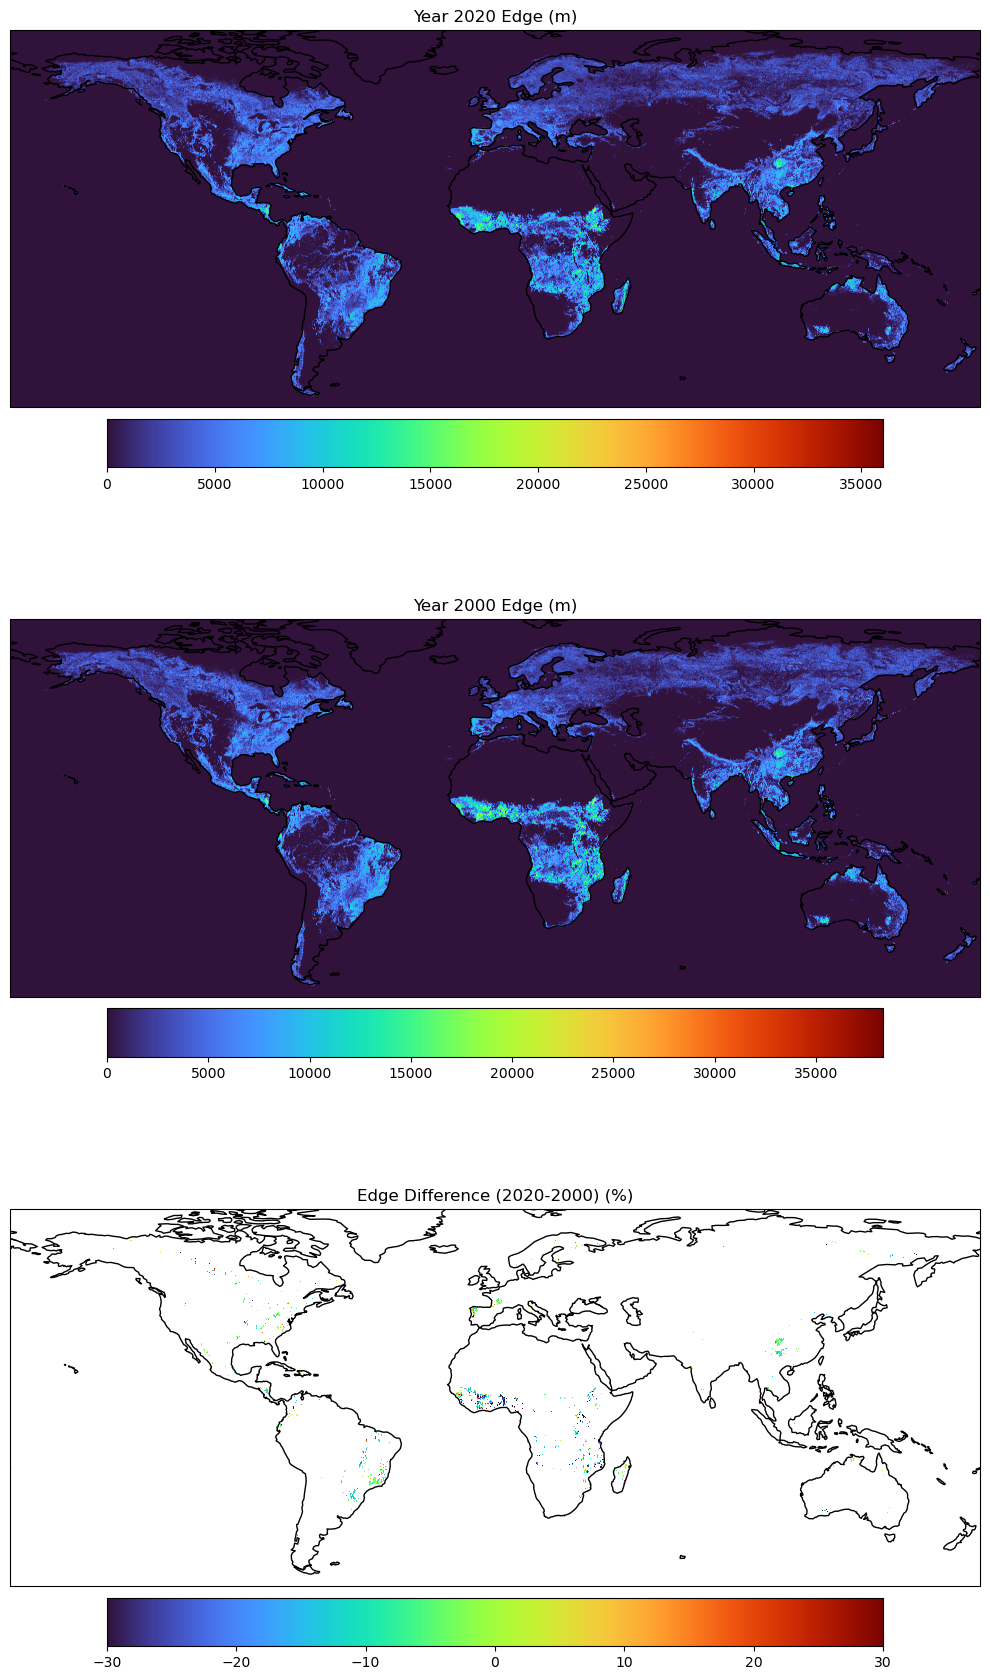

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import rasterio

# 打开文件
with rasterio.open('H:/Global_tree_cover/TIFoutput/Whole Map/2020GlobalEdge_float.tif') as src:
    array2020 = src.read(1)  # read方法接受一个参数，表示band的索引，索引从1开始
    nodata = src.nodatavals[0]
    geo_transform = src.transform
with rasterio.open('H:/Global_tree_cover/TIFoutput/Whole Map/2000GlobalEdge_float.tif') as src:
    array2000 = src.read(1)  # read方法接受一个参数，表示band的索引，索引从1开始

array2020 = np.where(array2020 == nodata, np.nan, array2020)
array2000 = np.where(array2000 == nodata, np.nan, array2000)



# 根据地理变换和数据数组的形状计算图像的边界
x_min = geo_transform[2]
x_max = geo_transform[2] + geo_transform[0]*array2020.shape[1]
y_min = geo_transform[5] + geo_transform[4]*array2020.shape[0]
y_max = geo_transform[5]

# 设置图像的边界
img_extent = (x_min, x_max, y_min, y_max)

# 创建3子图
fig, axs = plt.subplots(3, 1, figsize=(10, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制2020年的数据
img = axs[0].imshow(array2020, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo')
axs[0].set_title('Year 2020 Edge (m)')
fig.colorbar(img, ax=axs[0], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

# 绘制2000年的数据
img = axs[1].imshow(array2000, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo')
axs[1].set_title('Year 2000 Edge (m)')
fig.colorbar(img, ax=axs[1], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

# 计算差异
diff = 100 * (array2020 - array2000) / array2000

# 绘制差异
img = axs[2].imshow(diff, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=-30, vmax=30)
axs[2].set_title('Edge Difference (2020-2000) (%)')
fig.colorbar(img, ax=axs[2], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

for ax in axs:
    ax.coastlines()

plt.tight_layout()
plt.show()

In [35]:
nodata

-3.4028234663852886e+38

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import rasterio

# 打开文件
with rasterio.open('H:/Global_tree_cover/TIFoutput/Whole Map/2020GlobalArea_float.tif') as src:
    Area2020 = src.read(1)  # read方法接受一个参数，表示band的索引，索引从1开始
    nodata = src.nodatavals[0]
    geo_transform = src.transform
with rasterio.open('H:/Global_tree_cover/TIFoutput/Whole Map/2000GlobalArea_float.tif') as src:
    Area2000 = src.read(1)  # read方法接受一个参数，表示band的索引，索引从1开始

Area2020 = np.where(Area2020 == nodata, np.nan, Area2020)
Area2000 = np.where(Area2000 == nodata, np.nan, Area2000)

# 创建3子图
fig, axs = plt.subplots(3, 1, figsize=(10, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制2020年的数据
img = axs[0].imshow(Area2020, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo')
axs[0].set_title('Area Year 2020 (m^2)')
fig.colorbar(img, ax=axs[0], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

# 绘制2000年的数据
img = axs[1].imshow(Area2000, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo')
axs[1].set_title('Area Year 2000 (m^2)')
fig.colorbar(img, ax=axs[1], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

# 计算差异

diffArea = 100 * (Area2020 - Area2000) / Area2000
diffArea = np.where(np.isnan(diffArea), 0, diffArea)  # 将NaN值替换为0

# 绘制差异
img = axs[2].imshow(diffArea, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=-30, vmax=30)
axs[2].set_title('Area Difference (2020-2000) (%)')
fig.colorbar(img, ax=axs[2], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

for ax in axs:
    ax.coastlines()

plt.tight_layout()
plt.show()

C:\Users\hyou34\AppData\Local\Temp\ipykernel_17260\2633436333.py:32: RuntimeWarning: divide by zero encountered in divide
  diffArea = 100 * (Area2020 - Area2000) / Area2000
C:\Users\hyou34\AppData\Local\Temp\ipykernel_17260\2633436333.py:32: RuntimeWarning: invalid value encountered in divide
  diffArea = 100 * (Area2020 - Area2000) / Area2000


In [ ]:
FFI2020 = array2020*array2020/Area2020
FFI2000 = array2000*array2000/Area2000
# 创建3子图
fig, axs = plt.subplots(3, 1, figsize=(10, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制2020年的数据
img = axs[0].imshow(np.where(Area2020 == nodata, np.nan, FFI2020), origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo')
axs[0].set_title('Area Year 2020 (m^2)')
fig.colorbar(img, ax=axs[0], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

# 绘制2000年的数据
img = axs[1].imshow(np.where(Area2000 == nodata, np.nan, FFI2000), origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo')
axs[1].set_title('Area Year 2000 (m^2)')
fig.colorbar(img, ax=axs[1], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

# 计算差异
FFI2000cor = np.where(Area2000 != 0, array2000*array2000/Area2000, 0)
diffFFI = (FFI2020 - FFI2000cor)
diffArea = np.where(np.isnan(diffArea), 0, diffArea)  # 将NaN值替换为0

# 绘制差异
img = axs[2].imshow(diffArea, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), cmap='turbo', vmin=-30, vmax=30)
axs[2].set_title('Area Difference (2020-2000) (%)')
fig.colorbar(img, ax=axs[2], orientation='horizontal', pad=0.02, aspect=16, shrink=0.8)

for ax in axs:
    ax.coastlines()

plt.tight_layout()
plt.show()